# Importing the libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql


# Load the applicants data

In [3]:

app_data=pd.read_csv(r"D:\internship\Project_1\Application_Data.csv",header=0)
app_data_bk=app_data.copy()


# Display the dataset information

In [4]:
app_data.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,39,1


# Data Info

In [5]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

Text(0.5, 1.0, 'Target feature distribution in Train data')

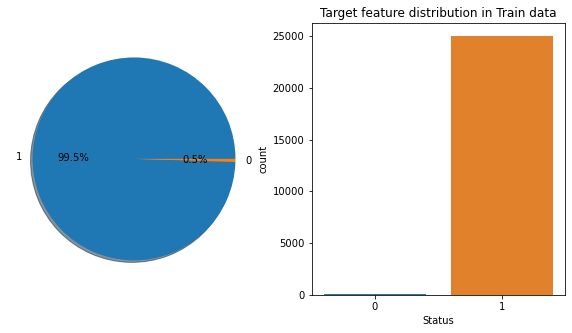

In [6]:
plt.figure(figsize=(10,5))

#plot pie chart
plt.subplot(1,2,1)
label = app_data.Status.value_counts().index
label_count = app_data.Status.value_counts().values
plt.pie(data=app_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)


plt.subplot(1,2,2)
sns.countplot(x='Status', data=app_data)
plt.title('Target feature distribution in Train data')

The data to be plotted:

[[44 98 91 93 37  9 27 81 56  5]
 [75 15 27 91 29 25 32 63 58 22]
 [38 20 36 33 16 68 76 44 24 87]
 [56 34 86 74 67  9 20 18 76 72]
 [99 53 81 52 95 47 75 28 69 38]
 [35 85 42 74 65 96  3 50 56 63]
 [91 88 60 97 64 57 97 63  3 28]
 [93 68 40  3 37 11 54 29 57 56]
 [55 90 29 22 90 78 80 10 29 93]
 [98 17 49 66 27 10 33 57 15  7]]


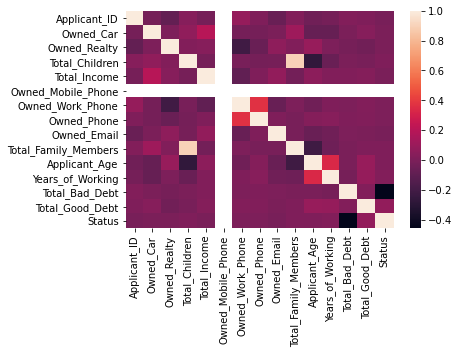

In [7]:
data = np.random.randint(low = 1,
                         high = 100,
                         size = (10, 10))
print("The data to be plotted:\n")
print(data)
  
# plotting the heatmap
hm = sns.heatmap(app_data.corr())
  
# displaying the plotted heatmap
plt.show()

In [8]:
#Plot histogram 
plt.hist(app_data.Height,bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Height'

# Delete the unwanted Columns

In [22]:
del app_data['Applicant_ID']

In [23]:
cat_cols = ['Applicant_Gender','Income_Type','Education_Type','Family_Status','Housing_Type','Job_Title']

app_data= pd.get_dummies(app_data,columns=cat_cols)

app_data= pd.DataFrame(app_data)
app_data.head()


,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,Applicant_Gender_F,Applicant_Gender_M,Income_Type_Commercial associate,Income_Type_Pensioner,Income_Type_State servant,Income_Type_Student,Income_Type_Working,Education_Type_Academic degree,Education_Type_Higher education,Education_Type_Incomplete higher,Education_Type_Lower secondary,Education_Type_Secondary / secondary special,Family_Status_Civil marriage,Family_Status_Married,Family_Status_Separated,Family_Status_Single / not married,Family_Status_Widow,Housing_Type_Co-op apartment,Housing_Type_House / apartment,Housing_Type_Municipal apartment,Housing_Type_Office apartment,Housing_Type_Rented apartment,Housing_Type_With parents,Job_Title_Accountants,Job_Title_Cleaning staff,Job_Title_Cooking staff,Job_Title_Core staff,Job_Title_Drivers,Job_Title_HR staff,Job_Title_High skill tech staff,Job_Title_IT staff,Job_Title_Laborers,Job_Title_Low-skill Laborers,Job_Title_Managers,Job_Title_Medicine staff,Job_Title_Private service staff,Job_Title_Realty agents,Job_Title_Sales staff,Job_Title_Secretaries,Job_Title_Security staff,Job_Title_Waiters/barmen staff
0,1,1,0,112500,1,0,0,0,2,59,4,0,30,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,270000,1,0,1,1,1,53,9,0,5,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,270000,1,0,1,1,1,53,9,0,5,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,270000,1,0,1,1,1,53,9,0,27,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,270000,1,0,1,1,1,53,9,0,39,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
app_data_dup= app_data[app_data.duplicated(keep='last')]
app_data_dup


,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,Applicant_Gender_F,Applicant_Gender_M,Income_Type_Commercial associate,Income_Type_Pensioner,Income_Type_State servant,Income_Type_Student,Income_Type_Working,Education_Type_Academic degree,Education_Type_Higher education,Education_Type_Incomplete higher,Education_Type_Lower secondary,Education_Type_Secondary / secondary special,Family_Status_Civil marriage,Family_Status_Married,Family_Status_Separated,Family_Status_Single / not married,Family_Status_Widow,Housing_Type_Co-op apartment,Housing_Type_House / apartment,Housing_Type_Municipal apartment,Housing_Type_Office apartment,Housing_Type_Rented apartment,Housing_Type_With parents,Job_Title_Accountants,Job_Title_Cleaning staff,Job_Title_Cooking staff,Job_Title_Core staff,Job_Title_Drivers,Job_Title_HR staff,Job_Title_High skill tech staff,Job_Title_IT staff,Job_Title_Laborers,Job_Title_Low-skill Laborers,Job_Title_Managers,Job_Title_Medicine staff,Job_Title_Private service staff,Job_Title_Realty agents,Job_Title_Sales staff,Job_Title_Secretaries,Job_Title_Security staff,Job_Title_Waiters/barmen staff
1,0,1,0,270000,1,0,1,1,1,53,9,0,5,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,1,1,0,135000,1,0,0,0,2,49,4,0,9,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,1,1,0,135000,1,0,0,0,2,49,4,0,9,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17,1,1,3,270000,1,0,0,0,5,35,4,0,17,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
25,1,1,0,112500,1,0,1,0,2,57,13,0,33,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25077,1,0,0,180000,1,0,0,0,2,32,4,0,6,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25094,1,1,1,315000,1,0,0,0,3,45,22,0,7,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
25098,1,1,2,157500,1,1,1,0,4,40,13,0,49,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
25099,1,1,2,157500,1,1,1,0,4,40,13,0,49,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [25]:
app_data.isnull().sum()

Owned_Car                                                            0
Owned_Realty                                                         0
Total_Children                                                       0
Total_Income                                                         0
Owned_Mobile_Phone                                                   0
Owned_Work_Phone                                                     0
Owned_Phone                                                          0
Owned_Email                                                          0
Total_Family_Members                                                 0
Applicant_Age                                                        0
Years_of_Working                                                     0
Total_Bad_Debt                                                       0
Total_Good_Debt                                                      0
Status                                                               0
Applic

In [26]:
IndepVar = []
for col in app_data.columns:
    if col != 'Status':
        IndepVar.append(col)
TargetVar = 'Status'

x = app_data[IndepVar]
y = app_data[TargetVar]



In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)


In [28]:
cols=['Total_Income','Total_Family_Members','Applicant_Age','Years_of_Working','Total_Good_Debt']

In [29]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)


In [30]:
# Load the Results dataset

Results = pd.read_csv(r"D:\internship\HTResults.csv", header=0)

Results.head()


,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[7495    1]
 [  27   16]]
Outcome values : 
 7495 1 27 16
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7496
           0       0.94      0.37      0.53        43

    accuracy                           1.00      7539
   macro avg       0.97      0.69      0.77      7539
weighted avg       1.00      1.00      1.00      7539

Accuracy : 99.6 %
Precision : 99.6 %
Recall : 100.0 %
F1 Score : 0.998
Specificity or True Negative Rate : 37.2 %
Balanced Accuracy : 68.6 %
roc_auc_score: 0.686


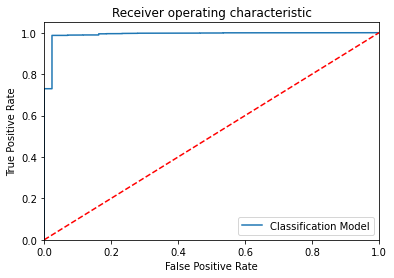

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[7489    7]
 [   3   40]]
Outcome values : 
 7489 7 3 40
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7496
           0       0.85      0.93      0.89        43

    accuracy                           1.00      7539
   macro avg       0.93      0.96      0.94      7539
weighted avg       1.00      1.00      1.00      7539

Accuracy : 99.9 %
Precision : 100.0 %
Recall : 99.9 %
F1 Score : 0.999
Specificity or True Negative Rate : 93.0 %
Balanced Accuracy : 96.4 %
roc_auc_score: 0.965


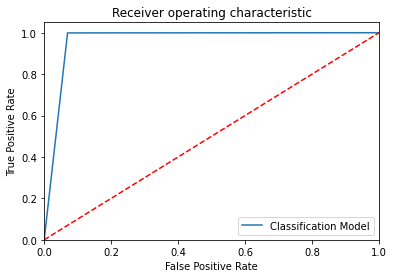

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[7496    0]
 [  29   14]]
Outcome values : 
 7496 0 29 14
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7496
           0       1.00      0.33      0.49        43

    accuracy                           1.00      7539
   macro avg       1.00      0.66      0.74      7539
weighted avg       1.00      1.00      1.00      7539

Accuracy : 99.6 %
Precision : 99.6 %
Recall : 100.0 %
F1 Score : 0.998
Specificity or True Negative Rate : 32.6 %
Balanced Accuracy : 66.3 %
roc_auc_score: 0.663


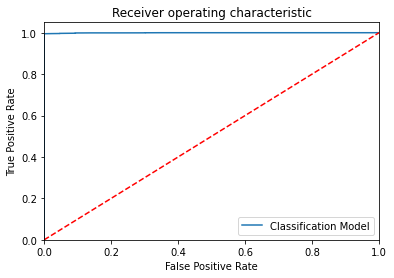

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[7494    2]
 [  28   15]]
Outcome values : 
 7494 2 28 15
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7496
           0       0.88      0.35      0.50        43

    accuracy                           1.00      7539
   macro avg       0.94      0.67      0.75      7539
weighted avg       1.00      1.00      1.00      7539

Accuracy : 99.6 %
Precision : 99.6 %
Recall : 100.0 %
F1 Score : 0.998
Specificity or True Negative Rate : 34.9 %
Balanced Accuracy : 67.4 %
roc_auc_score: 0.674


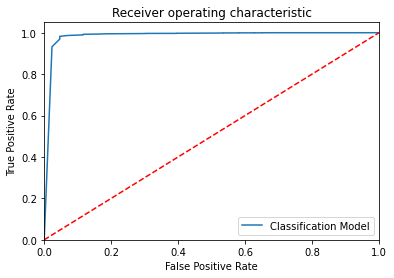

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[7492    4]
 [  34    9]]
Outcome values : 
 7492 4 34 9
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7496
           0       0.69      0.21      0.32        43

    accuracy                           0.99      7539
   macro avg       0.84      0.60      0.66      7539
weighted avg       0.99      0.99      0.99      7539

Accuracy : 99.5 %
Precision : 99.5 %
Recall : 99.9 %
F1 Score : 0.997
Specificity or True Negative Rate : 20.9 %
Balanced Accuracy : 60.4 %
roc_auc_score: 0.604


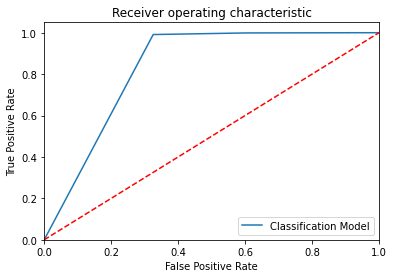

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[7496    0]
 [  38    5]]
Outcome values : 
 7496 0 38 5
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00      7496
           0       1.00      0.12      0.21        43

    accuracy                           0.99      7539
   macro avg       1.00      0.56      0.60      7539
weighted avg       0.99      0.99      0.99      7539

Accuracy : 99.5 %
Precision : 99.5 %
Recall : 100.0 %
F1 Score : 0.997
Specificity or True Negative Rate : 11.6 %
Balanced Accuracy : 55.8 %
roc_auc_score: 0.558


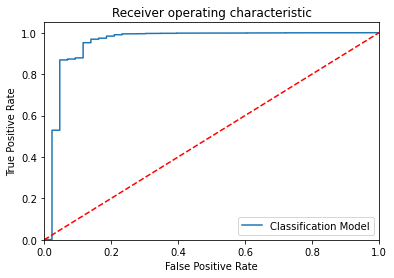

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[7496    0]
 [   1   42]]
Outcome values : 
 7496 0 1 42
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7496
           0       1.00      0.98      0.99        43

    accuracy                           1.00      7539
   macro avg       1.00      0.99      0.99      7539
weighted avg       1.00      1.00      1.00      7539

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 98.8 %
roc_auc_score: 0.988


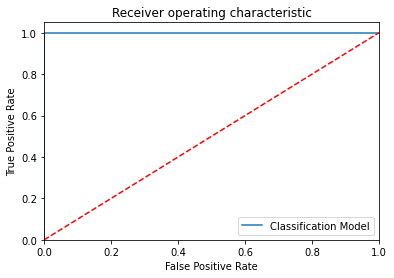

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[7493    3]
 [   9   34]]
Outcome values : 
 7493 3 9 34
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7496
           0       0.92      0.79      0.85        43

    accuracy                           1.00      7539
   macro avg       0.96      0.90      0.92      7539
weighted avg       1.00      1.00      1.00      7539

Accuracy : 99.8 %
Precision : 99.9 %
Recall : 100.0 %
F1 Score : 0.999
Specificity or True Negative Rate : 79.1 %
Balanced Accuracy : 89.6 %
roc_auc_score: 0.895


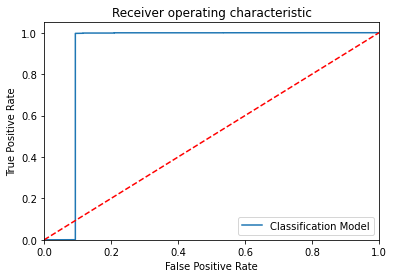

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[7494    2]
 [   1   42]]
Outcome values : 
 7494 2 1 42
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7496
           0       0.95      0.98      0.97        43

    accuracy                           1.00      7539
   macro avg       0.98      0.99      0.98      7539
weighted avg       1.00      1.00      1.00      7539

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 98.8 %
roc_auc_score: 0.988


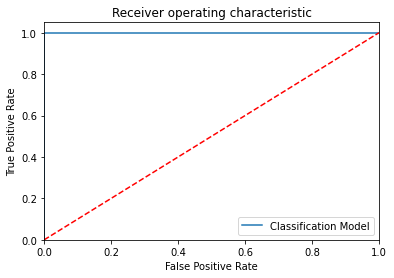

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[1287 6209]
 [   5   38]]
Outcome values : 
 1287 6209 5 38
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.17      0.29      7496
           0       0.01      0.88      0.01        43

    accuracy                           0.18      7539
   macro avg       0.50      0.53      0.15      7539
weighted avg       0.99      0.18      0.29      7539

Accuracy : 17.6 %
Precision : 99.6 %
Recall : 17.2 %
F1 Score : 0.293
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 52.8 %
roc_auc_score: 0.528


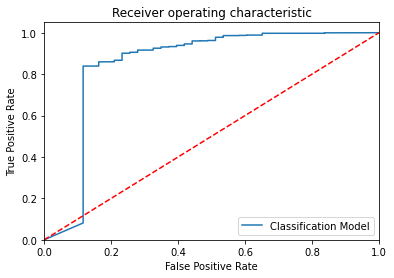

-----------------------------------------------------------------------------------------------------


In [31]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [32]:
 
Results


,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),7495,1,27,16,0.996,0.996,1.000,0.998,0.372,0.591,0.685980,0.686
1,DecisionTreeClassifier(),7489,7,3,40,0.999,1.000,0.999,0.999,0.930,0.889,0.964649,0.964
2,"(DecisionTreeClassifier(max_features='sqrt', r...",7496,0,29,14,0.996,0.996,1.000,0.998,0.326,0.569,0.662791,0.663
3,"(ExtraTreeClassifier(random_state=1266765294),...",7494,2,28,15,0.996,0.996,1.000,0.998,0.349,0.553,0.674285,0.674
4,KNeighborsClassifier(),7492,4,34,9,0.995,0.995,0.999,0.997,0.209,0.379,0.604384,0.604
5,SVC(probability=True),7496,0,38,5,0.995,0.995,1.000,0.997,0.116,0.340,0.558140,0.558
6,(DecisionTreeClassifier(random_state=101497660...,7496,0,1,42,1.000,1.000,1.000,1.000,0.977,0.988,0.988372,0.988
7,([DecisionTreeRegressor(criterion='friedman_ms...,7493,3,9,34,0.998,0.999,1.000,0.999,0.791,0.852,0.895149,0.896
8,LGBMClassifier(),7494,2,1,42,1.000,1.000,1.000,1.000,0.977,0.965,0.988239,0.988
9,GaussianNB(),1287,6209,5,38,0.176,0.996,0.172,0.293,0.884,0.011,0.527706,0.528
